In [1]:
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display

In [2]:
data =pd.read_excel('data.xlsx', sheet_name = 1)
data.head()

,Client,Sex,Age,Tenure
0,909,M,21,27
1,1217,M,38,165
2,850,F,49,44
3,1473,M,54,34
4,1038,M,29,106


In [3]:
mean_age = np.mean(data[data['Age']>= 14]['Age'])
mean_age = np.ceil(mean_age)

In [4]:
for i in data['Age']:
    if i < 14:
        data['Age'].replace(i, mean_age, inplace=True) 

In [5]:
np.max(data['Age'])

97

Text(0.5, 1.0, 'Age Group Distribution Plot')

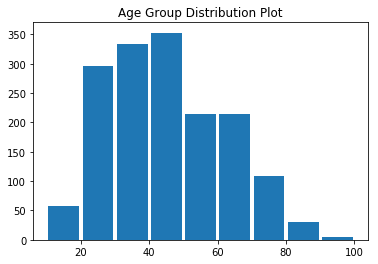

In [126]:
plt.figure()
bins = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
plt.hist(data['Age'], bins, histtype='bar', rwidth=.9)
plt.gca().set_title('Age Group Distribution Plot')

Text(0, 0.5, 'Tenure')

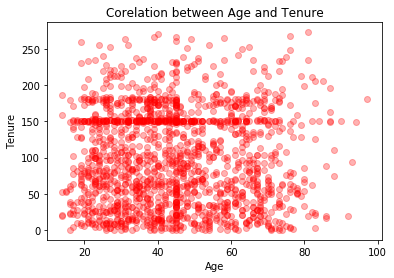

In [7]:
plt.figure()
plt.scatter(data['Age'], data['Tenure'], color='r', alpha = 0.3)
plt.gca().set_title('Corelation between Age and Tenure')
plt.gca().set_xlabel('Age')
plt.gca().set_ylabel('Tenure')

In [129]:
data = data.set_index('Client')
data.describe()

,Age,Tenure,Gender
count,1612.000000,1612.000000,1612.000000
mean,44.550248,101.408189,0.531017
std,16.821901,64.903220,0.499192
min,14.000000,0.000000,0.000000
25%,31.000000,44.000000,0.000000
50%,43.000000,97.000000,1.000000
75%,57.000000,151.000000,1.000000
max,97.000000,273.000000,1.000000


In [8]:
m = {'M':1, 'F': 0}
data['Gender'] = data['Sex'].map(m)
data.head()

,Client,Sex,Age,Tenure,Gender
0,909,M,21,27,1.0
1,1217,M,38,165,1.0
2,850,F,49,44,0.0
3,1473,M,54,34,1.0
4,1038,M,29,106,1.0


In [10]:
data = data[data['Sex'].notnull()]

In [11]:
rev = pd.read_excel('data.xlsx', sheet_name = 4)

In [12]:
rev = rev.set_index('Client')

In [13]:
new = pd.concat([data, rev], axis=1)
new.head()

,Client,Sex,Age,Tenure,Gender,Sale_MF,Sale_CC,Sale_CL,Revenue_MF,Revenue_CC,Revenue_CL
0,909.0,M,21.0,27.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1217.0,M,38.0,165.0,1.0,1.0,0.0,0.0,26.972679,0.0,0.0
2,850.0,F,49.0,44.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
3,1473.0,M,54.0,34.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
4,1038.0,M,29.0,106.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
in_out = pd.read_excel('data.xlsx', sheetname = 3)
in_out.head()

C:\Users\User\Anaconda3\lib\site-packages\pandas\io\excel.py:329: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  **kwds)


,Client,VolumeCred,VolumeCred_CA,TransactionsCred,TransactionsCred_CA,VolumeDeb,VolumeDeb_CA,VolumeDebCash_Card,VolumeDebCashless_Card,VolumeDeb_PaymentOrder,TransactionsDeb,TransactionsDeb_CA,TransactionsDebCash_Card,TransactionsDebCashless_Card,TransactionsDeb_PaymentOrder
0,1017,0.005000,0.005000,1,1,118.046429,118.046429,25.000000,91.796429,0.000000,12,12,2,9,0
1,1456,364.772143,364.752857,4,3,774.980000,774.980000,14.285714,497.444286,258.607143,28,28,1,20,5
2,545,2471.719286,2471.719286,14,14,2190.257143,2190.257143,303.571429,179.082143,1229.428571,23,23,3,5,12
3,667,1127.792857,1127.792857,4,4,1344.603571,1344.603571,642.857143,194.285714,249.321429,21,21,3,4,8
4,1381,571.618214,571.618214,3,3,57.071429,57.071429,10.714286,46.357143,0.000000,6,6,1,5,0


In [15]:
in_out = in_out.set_index('Client')

In [16]:
df = pd.concat([new, in_out], axis=1)

In [18]:
df = df.drop('Sex', axis=1)

In [19]:
prodBl = pd.read_excel('data.xlsx', sheetname = 2)
prodBl = prodBl.set_index('Client')

In [22]:
df1 = pd.concat([df, prodBl], axis=1)
df1.head()

,Client,Age,Tenure,Gender,Sale_MF,Sale_CC,Sale_CL,Revenue_MF,Revenue_CC,Revenue_CL,...,Count_MF,Count_OVD,Count_CC,Count_CL,ActBal_CA,ActBal_SA,ActBal_MF,ActBal_OVD,ActBal_CC,ActBal_CL
0,909.0,21.0,27.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1217.0,38.0,165.0,1.0,1.0,0.0,0.0,26.972679,0.0,0.0,...,NaN,1.0,NaN,NaN,1333.802857,NaN,NaN,0.0,NaN,NaN
2,850.0,49.0,44.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,NaN,NaN,NaN,NaN,110.768571,13326.190357,NaN,NaN,NaN,NaN
3,1473.0,54.0,34.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,482.654643,NaN,107.251786,NaN,NaN,NaN
4,1038.0,29.0,106.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,1599.840714,76.437143,NaN,NaN,1110.381786,NaN


In [34]:
df1['Revenue_MF'] = df1['Revenue_MF'].fillna(0)

In [37]:
df1['Revenue_CC'] = df1['Revenue_CC'].fillna(0)

In [38]:
df1['Revenue_CL'] = df1['Revenue_CL'].fillna(0)

In [40]:
df1.columns

Index(['Client', 'Age', 'Tenure', 'Gender', 'Sale_MF', 'Sale_CC', 'Sale_CL',
       'Revenue_MF', 'Revenue_CC', 'Revenue_CL', 'VolumeCred', 'VolumeCred_CA',
       'TransactionsCred', 'TransactionsCred_CA', 'VolumeDeb', 'VolumeDeb_CA',
       'VolumeDebCash_Card', 'VolumeDebCashless_Card',
       'VolumeDeb_PaymentOrder', 'TransactionsDeb', 'TransactionsDeb_CA',
       'TransactionsDebCash_Card', 'TransactionsDebCashless_Card',
       'TransactionsDeb_PaymentOrder', 'Count_CA', 'Count_SA', 'Count_MF',
       'Count_OVD', 'Count_CC', 'Count_CL', 'ActBal_CA', 'ActBal_SA',
       'ActBal_MF', 'ActBal_OVD', 'ActBal_CC', 'ActBal_CL'],
      dtype='object')

In [42]:
df2 = df1.fillna(0)

In [140]:
df_test = df2.iloc[:, 10:18]

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


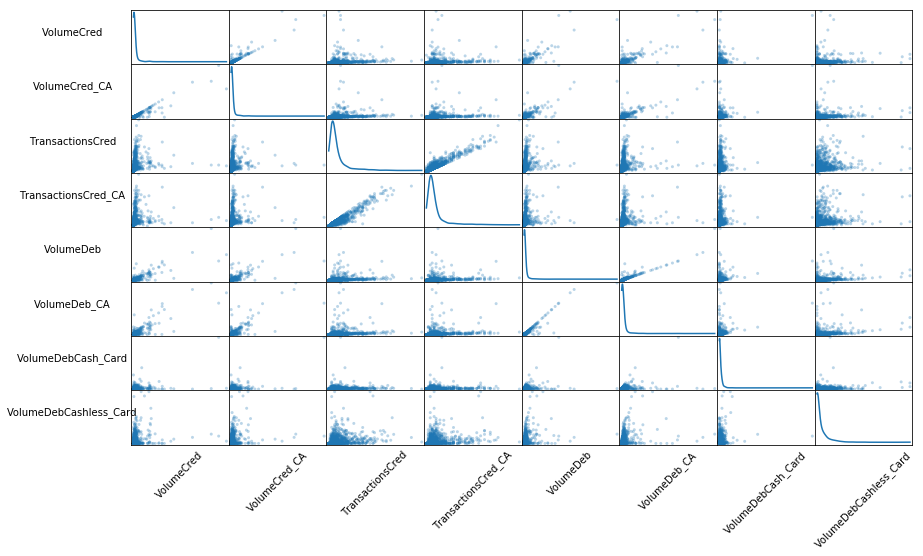

In [148]:
sm = pd.scatter_matrix(df_test, alpha = 0.3, figsize = (14,8), diagonal = 'kde');
[s.xaxis.label.set_rotation(45) for s in sm.reshape(-1)]
[s.yaxis.label.set_rotation(0) for s in sm.reshape(-1)]

#May need to offset label when rotating to prevent overlap of figure
[s.get_yaxis().set_label_coords(-0.6,0.5) for s in sm.reshape(-1)]

#Hide all ticks
[s.set_xticks(()) for s in sm.reshape(-1)]
[s.set_yticks(()) for s in sm.reshape(-1)]
plt.show()

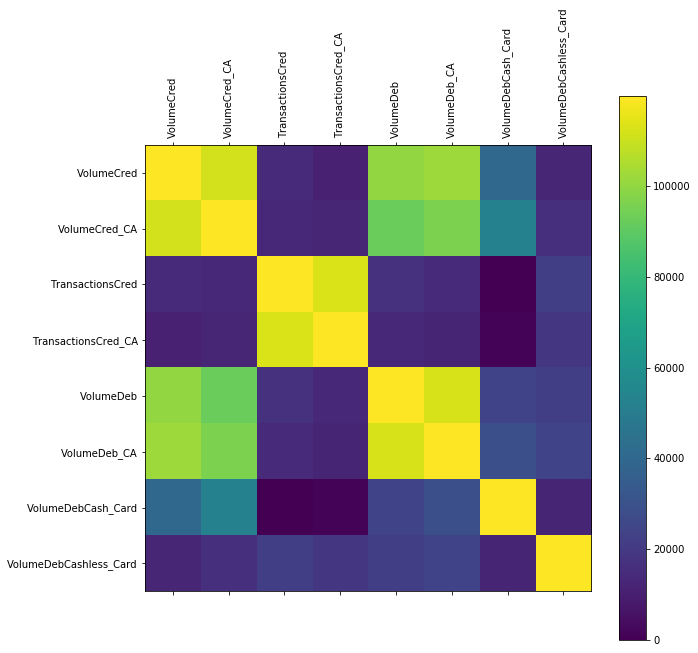

In [149]:
def plot_corr(df,size=10):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    cax = ax.matshow(df, interpolation='nearest')
    ax.matshow(corr)
    fig.colorbar(cax)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation = 'vertical');
    plt.yticks(range(len(corr.columns)), corr.columns);

plot_corr(df_test)

In [ ]:
##Revenue_MF

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectPercentile
X = df2.drop(['Revenue_MF', 'Revenue_CC', 'Revenue_CL'], axis=1)
y = df2['Revenue_MF']

In [45]:
y = np.ceil(y)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=.5)

select = SelectPercentile(percentile=50)
select.fit(X_train, y_train)
X_train_selected = select.transform(X_train)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw


In [50]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train_selected)
X_test_selected = select.transform(X_test)
X_test = sc.transform(X_test_selected)

In [103]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.svm import SVR
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1, 0.1,.01, 1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]
clf_fit = SVR(gamma='scale', C=1.0, epsilon=0.2).fit(X_train, y_train)

In [151]:
clf_fit.score(X_test, y_test)

0.14589421028398175

In [150]:
y_pred = clf_fit.predict(X_test)
cost = np.ceil(np.sum((np.square(y_test-y_pred)))/(2*len(y_test)))
cost

18.0

In [51]:
from sklearn.model_selection import GridSearchCV
regr_rf = RandomForestRegressor()
grid_values = {'n_estimators': [10, 20, 30, 40, 60, 80, 90, 90, 100], 'max_depth': [None, 2, 3, 4, 5, 10, 15, 20], 'bootstrap':[True,False]}
grid_clf_auc = GridSearchCV(regr_rf, param_grid = grid_values)
grid_clf_auc.fit(X_train, y_train)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [10, 20, 30, 40, 60, 80, 90, 90, 100], 'max_depth': [None, 2, 3, 4, 5, 10, 15, 20], 'bootstrap': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [52]:
grid_clf_auc.best_params_

{'bootstrap': True, 'max_depth': 5, 'n_estimators': 20}

In [53]:
grid_clf_auc.best_score_

0.30830223695224174

In [54]:
y_pred=grid_clf_auc.predict(X_test)

In [56]:
cost=np.ceil(np.sum((np.square(y_test-y_pred)))/(2*len(y_test)))
cost

41.0

In [57]:
#Linear Regression

In [58]:
from sklearn.linear_model import LinearRegression, LassoCV, ElasticNetCV
from sklearn.linear_model import Ridge, RidgeCV

In [59]:
lr = LinearRegression()
lasso_cv = LassoCV()
enet_cv = ElasticNetCV()
ridge_cv = RidgeCV()

In [60]:
lr.fit(X_train, y_train)
lasso_cv.fit(X_train, y_train)
enet_cv.fit(X_train, y_train)
ridge_cv.fit(X_train, y_train)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=None, fit_intercept=True,
    gcv_mode=None, normalize=False, scoring=None, store_cv_values=False)

In [61]:
rr = Ridge(alpha=0.1)
rr.fit(X_train, y_train)
rr10 = Ridge(alpha=10)

In [62]:
print('LassoCV alpha:', lasso_cv.alpha_)
print('RidgeCV alpha:', ridge_cv.alpha_)
print('ElasticNetCV alpha:', enet_cv.alpha_, 'ElasticNetCV l1_ratio:', enet_cv.l1_ratio_)
ridge_alpha = ridge_cv.alpha_
enet_alpha, enet_l1ratio = enet_cv.alpha_, enet_cv.l1_ratio_

LassoCV alpha: 0.5924484227873216
RidgeCV alpha: 10.0
ElasticNetCV alpha: 0.44610605612594195 ElasticNetCV l1_ratio: 0.5


In [64]:
enet_new_l1ratios = [enet_l1ratio * mult for mult in [.9, .95, 1, 1.05, 1.1]]
ridge_new_alphas = [ridge_alpha * mult for mult in [.9, .95, 1, 1.05, 1.1]]

# fit Enet and Ridge again:
enet_cv = ElasticNetCV(l1_ratio=enet_new_l1ratios)
ridge_cv = RidgeCV(alphas=ridge_new_alphas)

enet_cv.fit(X_train, y_train)
ridge_cv.fit(X_train, y_train)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


RidgeCV(alphas=array([ 9. ,  9.5, 10. , 10.5, 11. ]), cv=None,
    fit_intercept=True, gcv_mode=None, normalize=False, scoring=None,
    store_cv_values=False)

In [65]:
ridge_cv.score(X_test, y_test)

0.1269948898387515

In [66]:
enet_cv.score(X_test, y_test)

0.1220923024668229

In [67]:
rr.score(X_test, y_test)

0.12747011897182237

In [68]:
ey_pred = enet_cv.predict(X_test)

In [69]:
cost = np.ceil(np.sum((np.square(y_test-ey_pred)))/(2*len(y_test)))
cost

39.0

In [107]:
##Revenue_CC

In [108]:
y = np.ceil(df2['Revenue_CC'])

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

select = SelectPercentile(percentile=50)
select.fit(X_train, y_train)
X_train_selected = select.transform(X_train)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw


In [110]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train_selected)
X_test_selected = select.transform(X_test)
X_test = sc.transform(X_test_selected)

In [123]:
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1, 0.1,.01, 1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]
clf_fit = SVR(gamma='scale', C=1.0, epsilon=0.2).fit(X_train, y_train)

In [124]:
clf_fit.score(X_test, y_test)

0.14589421028398175

In [125]:
y_pred = clf_fit.predict(X_test)
cost = np.ceil(np.sum((np.square(y_test-ey_pred)))/(2*len(y_test)))
cost

16.0

In [111]:
regr_rf = RandomForestRegressor()
grid_values = {'n_estimators': [10, 20, 30, 40, 60, 80, 90, 90, 100], 'max_depth': [None, 2, 3, 4, 5, 10, 15, 20], 'bootstrap':[True,False]}
grid_clf_auc = GridSearchCV(regr_rf, param_grid = grid_values)
grid_clf_auc.fit(X_train, y_train)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [10, 20, 30, 40, 60, 80, 90, 90, 100], 'max_depth': [None, 2, 3, 4, 5, 10, 15, 20], 'bootstrap': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [112]:
grid_clf_auc.best_params_

{'bootstrap': True, 'max_depth': 2, 'n_estimators': 10}

In [113]:
grid_clf_auc.best_score_

0.041952671370480345

In [152]:
y_pred=grid_clf_auc.predict(X_test)
cost=np.ceil(np.sum((np.square(y_test-y_pred)))/(2*len(y_test)))
cost

23.0

In [115]:
lr.fit(X_train, y_train)
lasso_cv.fit(X_train, y_train)
enet_cv.fit(X_train, y_train)
ridge_cv.fit(X_train, y_train)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


RidgeCV(alphas=array([10.89 , 11.495, 12.1  , 12.705, 13.31 ]), cv=None,
    fit_intercept=True, gcv_mode=None, normalize=False, scoring=None,
    store_cv_values=False)

In [116]:
rr = Ridge(alpha=9)
rr.fit(X_train, y_train)

Ridge(alpha=9, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [117]:
print('LassoCV alpha:', lasso_cv.alpha_)
print('RidgeCV alpha:', ridge_cv.alpha_)
print('ElasticNetCV alpha:', enet_cv.alpha_, 'ElasticNetCV l1_ratio:', enet_cv.l1_ratio_)
ridge_alpha = ridge_cv.alpha_
enet_alpha, enet_l1ratio = enet_cv.alpha_, enet_cv.l1_ratio_

LassoCV alpha: 0.5010550153734064
RidgeCV alpha: 13.310000000000002
ElasticNetCV alpha: 0.4018001375409948 ElasticNetCV l1_ratio: 0.6655000000000002


In [118]:
enet_new_l1ratios = [enet_l1ratio * mult for mult in [.9, .95, 1, 1.05, 1.1]]
ridge_new_alphas = [ridge_alpha * mult for mult in [.9, .95, 1, 1.05, 1.1]]

# fit Enet and Ridge again:
enet_cv = ElasticNetCV(l1_ratio=enet_new_l1ratios)
ridge_cv = RidgeCV(alphas=ridge_new_alphas)

enet_cv.fit(X_train, y_train)
ridge_cv.fit(X_train, y_train)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


RidgeCV(alphas=array([11.979 , 12.6445, 13.31  , 13.9755, 14.641 ]), cv=None,
    fit_intercept=True, gcv_mode=None, normalize=False, scoring=None,
    store_cv_values=False)

In [119]:
ridge_cv.score(X_test, y_test)

0.16962341934863823

In [120]:
enet_cv.score(X_test, y_test)

0.23660830251001486

In [121]:
rr.score(X_test, y_test)

0.1675420966697969

In [122]:
ey_pred = enet_cv.predict(X_test)
cost = np.ceil(np.sum((np.square(y_test-ey_pred)))/(2*len(y_test)))
cost

16.0

In [86]:
##Revenue_CL

In [87]:
y = np.ceil(df2['Revenue_CL'])

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

select = SelectPercentile(percentile=50)
select.fit(X_train, y_train)
X_train_selected = select.transform(X_train)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw


In [89]:
X_train = sc.fit_transform(X_train_selected)
X_test_selected = select.transform(X_test)
X_test = sc.transform(X_test_selected)

In [90]:
regr_rf = RandomForestRegressor()
grid_values = {'n_estimators': [10, 20, 30, 40, 60, 80, 90, 90, 100], 'max_depth': [None, 2, 3, 4, 5, 10, 15, 20], 'bootstrap':[True,False]}
grid_clf_auc = GridSearchCV(regr_rf, param_grid = grid_values)
grid_clf_auc.fit(X_train, y_train)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [10, 20, 30, 40, 60, 80, 90, 90, 100], 'max_depth': [None, 2, 3, 4, 5, 10, 15, 20], 'bootstrap': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [91]:
grid_clf_auc.best_params_

{'bootstrap': True, 'max_depth': 2, 'n_estimators': 40}

In [92]:
grid_clf_auc.best_score_

0.5706614792850757

In [93]:
y_pred=grid_clf_auc.predict(X_test)
cost=np.ceil(np.sum((np.square(y_test-y_pred)))/(2*len(y_test)))
cost

5.0

In [94]:
lr.fit(X_train, y_train)
lasso_cv.fit(X_train, y_train)
enet_cv.fit(X_train, y_train)
ridge_cv.fit(X_train, y_train)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


RidgeCV(alphas=array([ 9.9 , 10.45, 11.  , 11.55, 12.1 ]), cv=None,
    fit_intercept=True, gcv_mode=None, normalize=False, scoring=None,
    store_cv_values=False)

In [95]:
rr = Ridge(alpha=9)
rr.fit(X_train, y_train)

Ridge(alpha=9, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [96]:
print('LassoCV alpha:', lasso_cv.alpha_)
print('RidgeCV alpha:', ridge_cv.alpha_)
print('ElasticNetCV alpha:', enet_cv.alpha_, 'ElasticNetCV l1_ratio:', enet_cv.l1_ratio_)
ridge_alpha = ridge_cv.alpha_
enet_alpha, enet_l1ratio = enet_cv.alpha_, enet_cv.l1_ratio_

LassoCV alpha: 0.2607041622506659
RidgeCV alpha: 12.100000000000001
ElasticNetCV alpha: 0.1865332369203104 ElasticNetCV l1_ratio: 0.6050000000000001


In [97]:
enet_new_l1ratios = [enet_l1ratio * mult for mult in [.9, .95, 1, 1.05, 1.1]]
ridge_new_alphas = [ridge_alpha * mult for mult in [.9, .95, 1, 1.05, 1.1]]

# fit Enet and Ridge again:
enet_cv = ElasticNetCV(l1_ratio=enet_new_l1ratios)
ridge_cv = RidgeCV(alphas=ridge_new_alphas)

enet_cv.fit(X_train, y_train)
ridge_cv.fit(X_train, y_train)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


RidgeCV(alphas=array([10.89 , 11.495, 12.1  , 12.705, 13.31 ]), cv=None,
    fit_intercept=True, gcv_mode=None, normalize=False, scoring=None,
    store_cv_values=False)

In [98]:
ridge_cv.score(X_test, y_test)

0.7364530891314542

In [99]:
enet_cv.score(X_test, y_test)

0.7389770170143408

In [100]:
rr.score(X_test, y_test)

0.7361349593955502

In [101]:
ey_pred = enet_cv.predict(X_test)
cost = np.ceil(np.sum((np.square(y_test-ey_pred)))/(2*len(y_test)))
cost

4.0